# CSCN8010-Lab6
Lifei Wang 8855277

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Import the Iris dataset and show keys

In [2]:
# import the dataset
iris = datasets.load_iris(as_frame=True)

# show keys
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

There are four attributes
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm



In [3]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


for three classes
* Iris-Setosa
* Iris-Versicolour
* Iris-Virginica


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
#X, y = datasets.load_iris(as_frame=True, return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

iris = datasets.load_iris(as_frame=True)
X = iris.data.values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# create log regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Train log regression model with predictions

References from logistic_regression class notebook

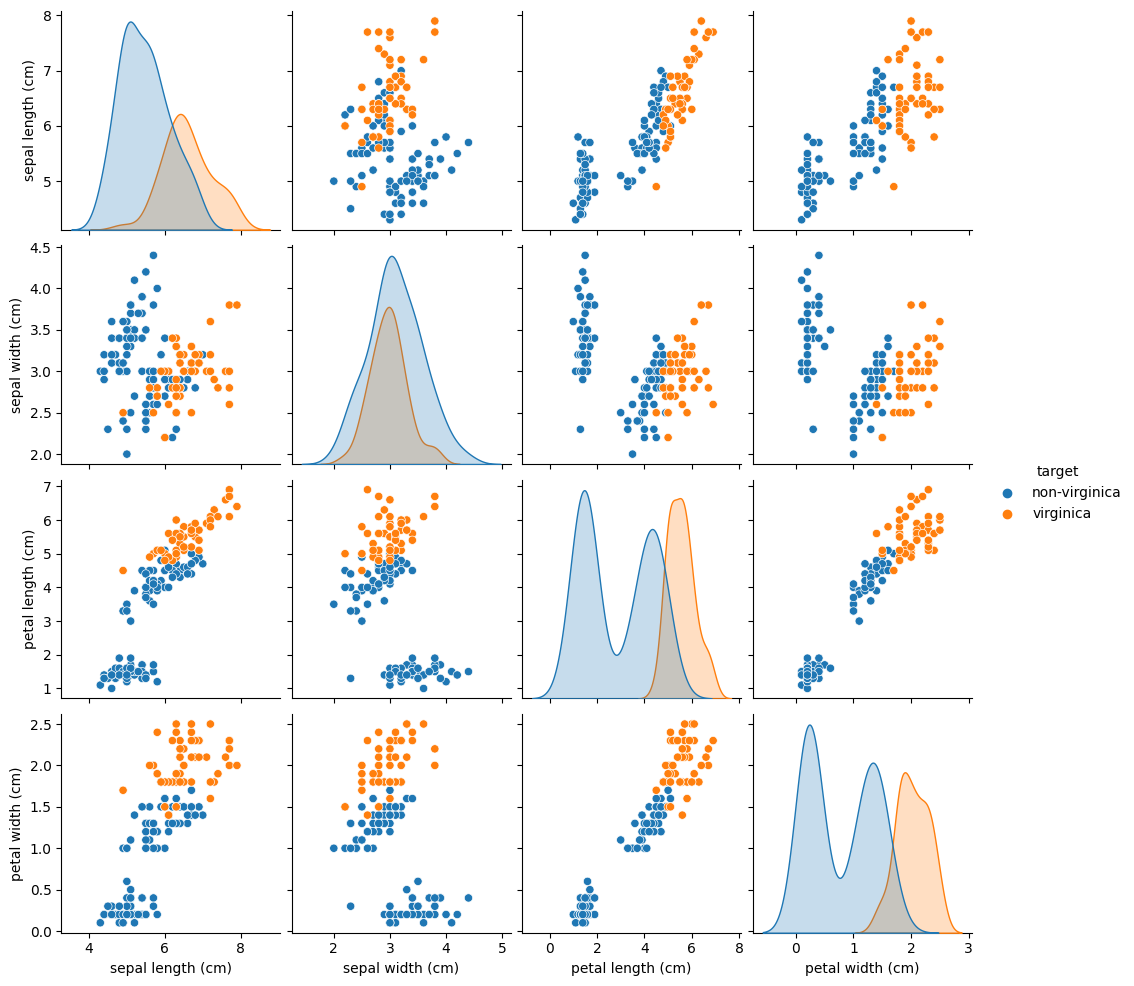

In [9]:
# plot using seaborn

# convert the dataset to data frame
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

# according to the dataset we know only 2 stands for virginica
iris_df['target'] = iris_df['target'].map({0: 'non-virginica', 1: 'non-virginica', 2: 'virginica'})

# plot
sns.pairplot(iris_df, hue='target')


Make prediction using the logistic regression model

Create two samples for prediction with following parameters

Sample 1:
* sepal length: 4.6cm
* sepal width: 2.3cm
* petal length: 0.9cm
* petal width: 1cm

Sample 2:
* sepal length: 4.7cm
* sepal width: 3.2cm
* petal length: 6.5cm
* petal width: 3cm

Prediction True: virginica, False: virginica

In [10]:
sample = np.array([[4.6, 2.3, 0.9, 1]])
sample = scaler.transform(sample)
prediction = log_reg.predict(sample)
prediction

array([False])

In [11]:
sample_2 = np.array([[4.7, 3.2, 6.5, 3]])
sample_2 = scaler.transform(sample_2)
prediction = log_reg.predict(sample_2)
prediction

array([ True])

plots refer to the logistic_regression notebook

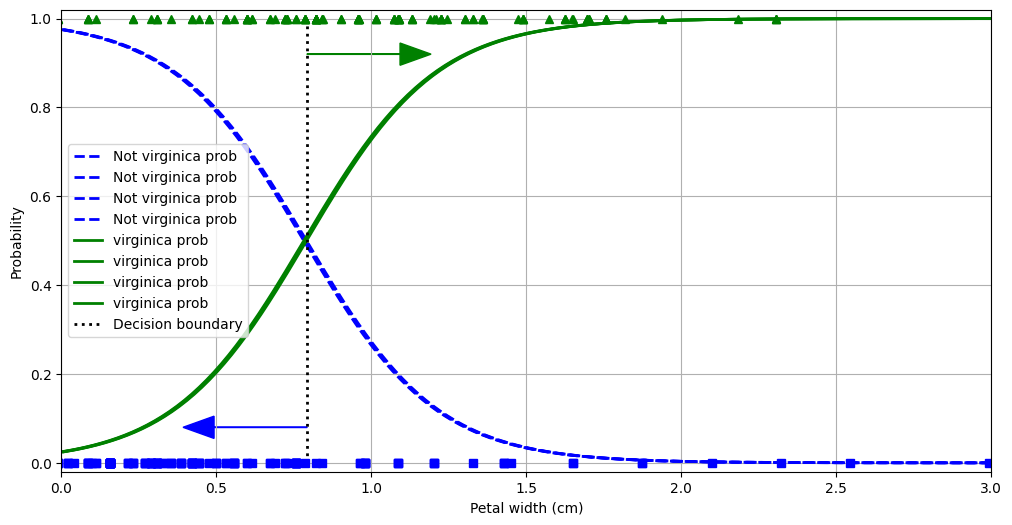

In [12]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 4)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

# adjust figure size
plt.figure(figsize=(12, 6))

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not virginica prob")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="virginica prob")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

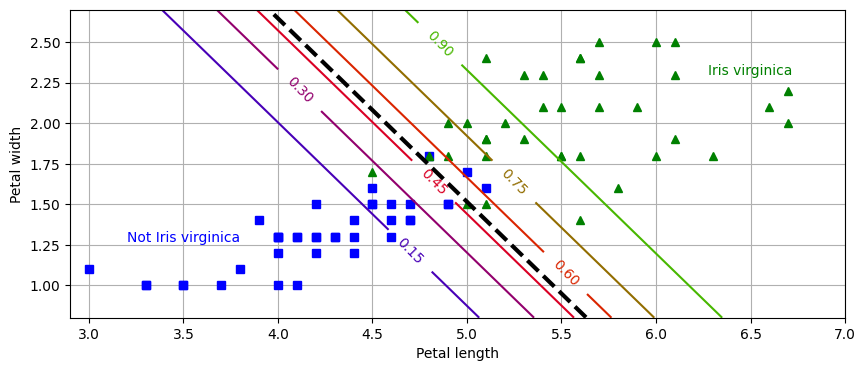

In [13]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

Evaluate the model by some metrics

In [17]:
# make prediction on test set
y_pred = log_reg.predict(X_test)

# get accuracy
accuracy = accuracy_score(y_test, y_pred)
print('accuracy: ', accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# classification report
class_report = classification_report(y_test, y_pred)
print('\nClassification report:\n', class_report)

accuracy:  1.0
Confusion matrix:
 [[26  0]
 [ 0 12]]

Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        26
        True       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Seems like the model is perfect since it predicts every instance correctly in the test set.

However it is unusual for a model to have 100% accuracy, it might indicate overfitting or other problems.

In the confusion matrix, there are 26 true positives, and 12 true negatives, 0 false positives and 0 false negatives.

For the classification report:

* precision is 1 for both classes, which means for both true and false classes it predicts perfectly.

* recall is 1 for both classes, which means it found all instances for both classes.

* f1 score is 1 which is the best value.

* support is the number of occurrences of each class in y_test.

It needs more information to see what happens to the model and how to adjust it.



